In [48]:
import spacy
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from xml.etree import cElementTree as ET
import re
import json
from collections import Counter
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from analysis_code.analyze_corpus import *

In [18]:
'''name definition'''
# infile = '/home/luluvyd/corpus/gutenberg-poetry-example.ndjson'
infile = '/home/luluvyd/corpus/gutenberg-poetry-v001.ndjson'

outdirect = '/home/luluvyd/corpus/gutenberg-break/poetry'

In [46]:
def breakFile(infile, n = 6): 
    '''
    break a giant input file into small output files of size n articles 
    parameters : infile : file handler of a giant input file
    i : i-th input file
    n : number of articles in each output file
    '''
    line = infile.readline()
    buffer = ""
    i = 0
    j = 0 
    pgid = -1
    
    while line:
        res = json.loads(line) 
        c = res['s']
        cgid = res['gid']
        if (cgid != pgid): 
            pgid = cgid
            i += 1 
            if (i % n == 0): 
                write_file = outdirect + '-' + str(j) + '.txt'
                with open(write_file, "w") as outfile:
                    outfile.write(buffer) 
                outfile.close() 
                buffer = ""
                j += 1
        buffer += c + " " 
        line = infile.readline()
    if buffer: 
        write_file = outdirect + '-' + str(j) + '.txt'
        with open(write_file, "w") as outfile:
            outfile.write(buffer)
        outfile.close()         

def countFileSize(infile): 
    '''
    break a giant input file into small output files of size n articles 
    parameters : infile : file handler of a giant input file
    i : i-th input file
    n : number of articles in each output file
    '''
    counter = {}
    line = infile.readline()
    pgid = -1
    num = 0
    
    while line:
        res = json.loads(line) 
        cgid = res['gid']
        num += 1
        if (cgid != pgid): 
            pgid = cgid
            counter[num] = 1 if num not in counter else (counter[num] + 1)
            num = 0
        line = infile.readline()
    if num > 0: 
        counter[num] = 1 if num not in counter else (counter[num] + 1)
    return Counter(counter)

In [47]:
'''
break-up reuter news files 
'''
with open(infile, 'r', errors='replace') as f:
#     breakFile(f)
    counter = countFileSize(f)
    print(counter)
f.close()

Counter({51: 5, 200: 4, 630: 4, 1175: 4, 1: 3, 31: 3, 130: 3, 141: 3, 147: 3, 178: 3, 314: 3, 419: 3, 524: 3, 530: 3, 840: 3, 1447: 3, 1454: 3, 367: 3, 2: 2, 15: 2, 33: 2, 41: 2, 59: 2, 62: 2, 67: 2, 70: 2, 73: 2, 81: 2, 87: 2, 90: 2, 91: 2, 102: 2, 106: 2, 110: 2, 125: 2, 136: 2, 144: 2, 151: 2, 165: 2, 166: 2, 167: 2, 183: 2, 189: 2, 195: 2, 210: 2, 243: 2, 255: 2, 262: 2, 263: 2, 265: 2, 318: 2, 328: 2, 333: 2, 346: 2, 351: 2, 358: 2, 360: 2, 362: 2, 363: 2, 364: 2, 379: 2, 395: 2, 413: 2, 418: 2, 423: 2, 424: 2, 469: 2, 4566: 2, 476: 2, 4588: 2, 495: 2, 4592: 2, 502: 2, 529: 2, 533: 2, 560: 2, 681: 2, 698: 2, 830: 2, 847: 2, 850: 2, 870: 2, 887: 2, 915: 2, 975: 2, 978: 2, 982: 2, 1034: 2, 1050: 2, 1051: 2, 1126: 2, 1138: 2, 1154: 2, 1162: 2, 1188: 2, 1200: 2, 1204: 2, 1221: 2, 1244: 2, 1263: 2, 1291: 2, 1318: 2, 1322: 2, 1364: 2, 1406: 2, 921: 2, 1464: 2, 1471: 2, 1474: 2, 1519: 2, 1522: 2, 1544: 2, 1557: 2, 1630: 2, 1638: 2, 1701: 2, 1735: 2, 1770: 2, 1797: 2, 1826: 2, 1671: 2, 18

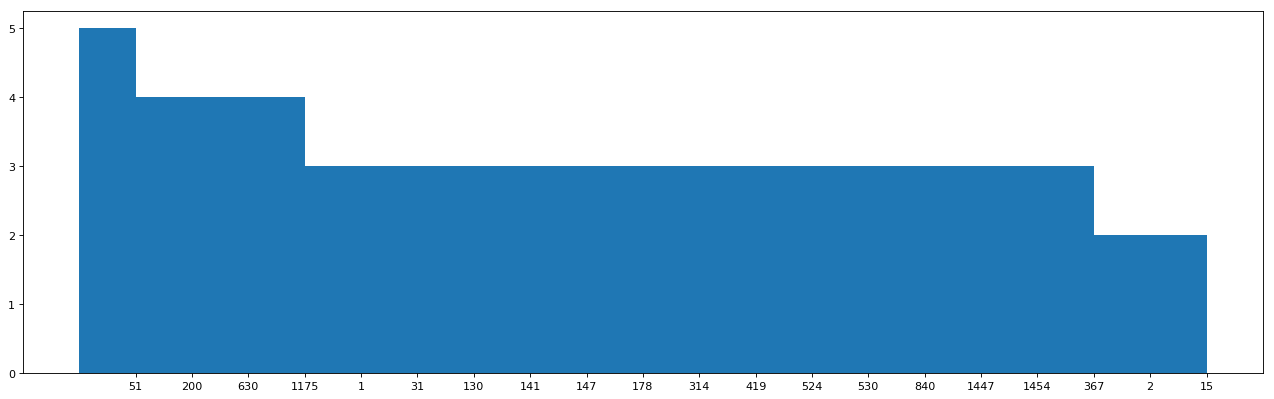

In [50]:
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counter)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

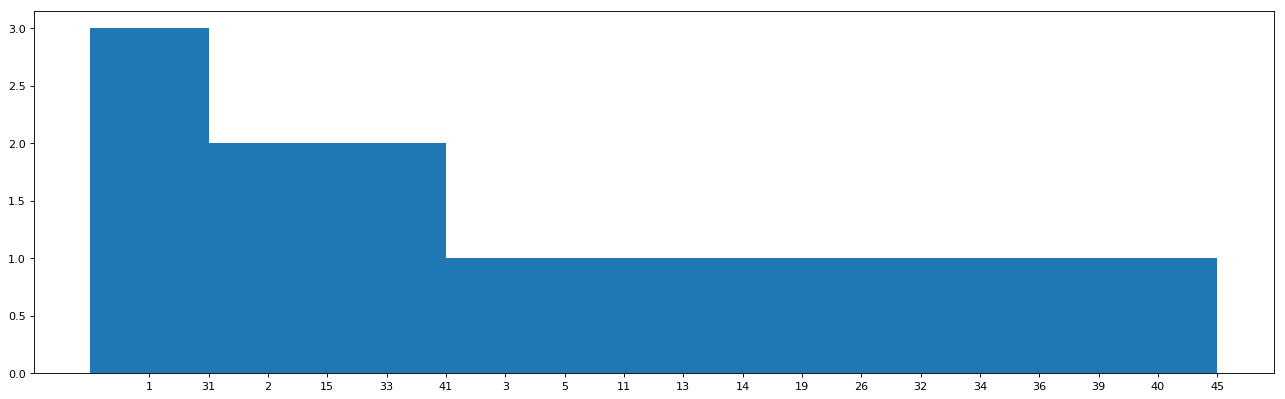

In [53]:
filtered = Counter({key : value for key, value in counter.items() if int(key) < 50})

plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(filtered)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()